*Welcome to the Data Science MVP template! The sections in this notebook are here to help you organize your data science project into a clear workflow. The text in the markdown cells is there to help you understand the goals at each stage. Follow their instructions to move your work along, and then delete the prompts when you're done.*

*At each step of this workflow, think critically and ask yourself what you aren't seeing. The point isn't to doubt yourself; the purpose here is to check your blind spots and see if you can't find more information or insights that will help you to deliver better results.* 

*Better yet, and this cannot be stressed enough, don't ask **yourself** these questions, but bring them up in conversation with peers, experts in other fields, or even complete strangers -- anyone with a different point of view is going to be able to help you to see what things you are taking for granted.*

# What is the Zestimate and what is the logerror?

Before diving in to this whole 'Zestimate' thing, it may help to clear up a few ideas, at least as we understand them in pursuing our project's goal.

There are two main values dictating home sale prices:

1.) The Market Value = what the BUYER says the property is worth; and

2.) The Appraised Value = what the BANK says the property is worth.

Banks win 99% of the time because banks have 99% of the money, and that's a good thing - it helps mitigate reality between Buyer and Seller.

I can't demand my house sell for a million dollars when the bank says it's only worth a Happy Meal. Conversely, the buyer can't buy my home for a Happy Meal when the bank says it's AT LEAST worth a Taco Bell Tripleupa Box. (That took some practice.)

Undertanding this communication gap, Zillow was created in 2006 as a way of providing information to both home-buyers and home-sellers, the end goal being a mutual understanding at the beginning of price negotiations. One of their flagship offerings is their 'Zestimate,' a constantly-updated and fine-tuned home valution model that is used to predict the market value of a home based on things like 'home facts, location, and market conditions' (italics are directly from their website, https://www.zillow.com/zestimate/).

While strong and highly durable, the Zestimate is not perfect, even by it's own admission. From the 'Median Error' section of the Zestimate website: "For most major markets, the Zestimate for on-market homes is within 10% of the final sale price more than 95% of the time."

Plain English: in cities of roughly a million or more people, the difference between Zillow's predicted home sale price is 10% different from the home's actual sale price. Not bad, but on a $300,000 home, Zestimate can only ballpark a sales price range between $270- and $330-thousand dollars, a potential dream-crusher for both parties (but don't worry: banks still make out alright).

Because homes are not fiat currencies (they have actual, real value), Zillow can continually improve their model with tangible feedback in hopes of minimizing that error gap.

To see what may be driving this error, we are using what we learned in the Clustering Methodologies section of our Data Science Q-Course. Instead of the listed 'Mean Error,' we are clustering to determine what is driving the 'logerror' experienced in Zillow's predictive model. Using logerror (a column from our provided MySQL database) means that we are assuming a distribution underlying Zillow estimates and actual home sale prices.

NB:
You may be wondering why we're dealing with California data. At least we know we were.

Turns out, Texas (and a handful of others) is a non-disclosure state, and the Texas Real Estate Commission - Rulers over all things Texas Real Estate - is under no legal obligation to provide any home sale price information to outside companies like Zillow or RedFin (the Pepsi-cousin to Zillow's Coke).

Take that for what it's worth, but that leads us to believe the logerror drivers we discover will be unique to the California Zestimate model, and cannot be applied universally without a sacrifice in overall accuracy.

## Work Plan

Our mission with this first unsupervised learning project was primarily to admit we'd been babied all along by labeled data.  Holy cow - direction was nice.  Being able to just throw in a visualization and take a look at existing correlations was a long walk on the beach compared to making **educated** guesses on a feature to include in our ML modeling.  

Much like our team name, we were all over the map in how to go about this, but settled on the following steps on getting this thing done to the best of our abilities.

1.) Imported the data from MySQL using the functions found in our acquire.py folder;

2.) From there, we took a 30,000-ft view of the data as it was in its (horrific) original state;

3.) Using the prepare.py file, we cleaned up the data into a chunk that made visualizations more easily digestible, which in turn gave us some semblance of confidence in putting together our clustering and KMeans models; and

4.) After observing the cleaned up data and visualizations, we began our modeling and evaluations using KMeans and then compared it to some labled linear regression models. 

After reviewing and executing all this, it would be nice to know the history of the model itself, from its inception in 2006.  Much of the data seems either repetitive, or the Ghost of Data Acquisition Past.  One would assume the fine folks at Zillow have internal controls / methods for dealing with some of this, but we have no way of knowing without having that insider information.

# Import

In [1]:
import src.acquire
import src.prepare
import src.explore
import src.model

import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)

# Modeling
from sklearn.linear_model import LinearRegression

# Acquire

In [2]:
# Reading in the data from the acquire.py into a dataframe
df = src.acquire.get_zillow_data()

CSV previously generated at `data/raw/zillow_unprocessed.csv`. Reading in that csv as a DataFrame


In [3]:
# Taking a look at the sum of missing values in each column. 
# Set 'max rows' to 'None' to eliminate truncating the data displayed
pd.set_option('max_rows', None)
src.prepare.nulls_by_col(df)

,number_missing_rows,percent_rows_missing
Unnamed: 0,0,0.000000
id,0,0.000000
parcelid,0,0.000000
airconditioningtypeid,52569,0.677654
architecturalstyletypeid,77369,0.997345
basementsqft,77525,0.999355
bathroomcnt,0,0.000000
bedroomcnt,0,0.000000
buildingclasstypeid,77560,0.999807
buildingqualitytypeid,27766,0.357925


Sooo... out of 69 columns containing 77,575 rows of data, 20.3% of the columns (14/69) are missing 99.3% (77,000/7,575) of the data.

According to Zillow, one of the metrics making up Zestimate is customer feedback. Right off the bat, seems like a good starting point to improving the model's logerror would be to either ask fewer questions, or combine categories, or template the questionnaires they send buyers, sellers, and agents. .7% of anything is by no means 'reliable' data, nor does it contribute in any way to improving predictie modeling.

# Wrangle

So that's a lot of gross data. Let's clean it up.

## Handling Nulls

### Features Dropped

- What metric are we using to drop features? 
> *If a specific feature is missing more than 50 percent of it's values, we'll drop it*

- What metric are we using to drop rows? 
> *If a row is missing more than 75 percent of it's values, we'll drop it*

In [4]:
# Dropping features and rows with too many missing values
df = src.prepare.handle_missing_values(df)


    Number of rows dropped:    156
    Number of columns dropped: 34
    


> While this helped us get rid of a decent number of unusable observations (rows), this process helps us greatly reduce the number of insignificant features in our data.

### Filling Nulls with Median

> For each feature listed below, we'll be filling the null values with the median of the feature. 

> This in particular will help for these features at it will reduce the effect of outliers within the data.

```
Features
- taxvaluedollarcnt:            $358,880
- taxamount:                    $4448.72
- fullbathcnt:                  2 bathrooms
- lotsizesquarefeet:            7,205 sqft
- calculatedfinishedsquarefeet: 1,542 sqft
- structuretaxvaluedollarcnt:   $136,389
- finishedsquarefeet12          1,523 sqft
```

In [5]:
df = src.prepare.fill_nulls_with_median(df)

### Filling Nulls with Mode

> For each feature listed below, we'll be filling the null values with the mode of the feature. 

```
Features
- regionidzip:           97319
- regionidcity:          12447
- yearbuilt:             1955
- landtaxvaluedollarcnt: $21,299
- lotsizesquarefeet:     6,000 sqft   
```

In [6]:
df = src.prepare.fill_nulls_with_mode(df)

In [7]:
mode = df.yearbuilt.mode()
df.yearbuilt.fillna(mode)

0        1998.0
1        1967.0
2        1962.0
3        1970.0
4        1964.0
5        1982.0
6        1950.0
7        1922.0
8        1970.0
9        1980.0
10       1999.0
11       1973.0
12       1989.0
13       1980.0
14       1989.0
15       2004.0
16       1981.0
17       1981.0
18       1939.0
19       1980.0
20       1979.0
21       1978.0
22       1998.0
23       1908.0
24       1983.0
25       1944.0
26       1972.0
27       1972.0
28       1920.0
29       1967.0
30       1967.0
31       1989.0
32       1980.0
33       1967.0
34       1992.0
35       2009.0
36       1977.0
37          NaN
38       1952.0
39       1989.0
40       1951.0
41       1948.0
42       1941.0
43       1928.0
44       1901.0
45       1991.0
46       2006.0
47       1922.0
48       2006.0
49       1953.0
50       2007.0
51       1987.0
52       2000.0
53       1958.0
54       1948.0
55       1991.0
56       1928.0
57       1991.0
58       1999.0
59       1983.0
60       2014.0
61       1962.0
62      

In [8]:
df.yearbuilt.isna().sum()

114

## Dropping Columns

Even though we've created a threshold to drop columns based on missing values, there's still some columns we should drop to clean up the dataframe:

```
Columns to Drop
- buildingqualitytypeid  -|
- heatingorsystemtypeid   | --> These features were used to merge in mySQL
- propertylandusetypeid  -|

- propertycountylandusecode: We've already filtered for single unit residents
- propertyzoningdesc:  Irrelevant data
- censustractandblock: Too many missing values
- Unnamed: 0: Remnant of reading from a csv
```

In [9]:
# Dropping columns
df = src.prepare.drop_columns(df)

# Explore

### Now that we've got our dollars to donuts: time to shine Zach's shoes while we attempt some visualizations

> Before we start, let's split the data

In [10]:
# Splitting into train, test, validate
train, test, validate = src.prepare.split_data(df)

## Histogram

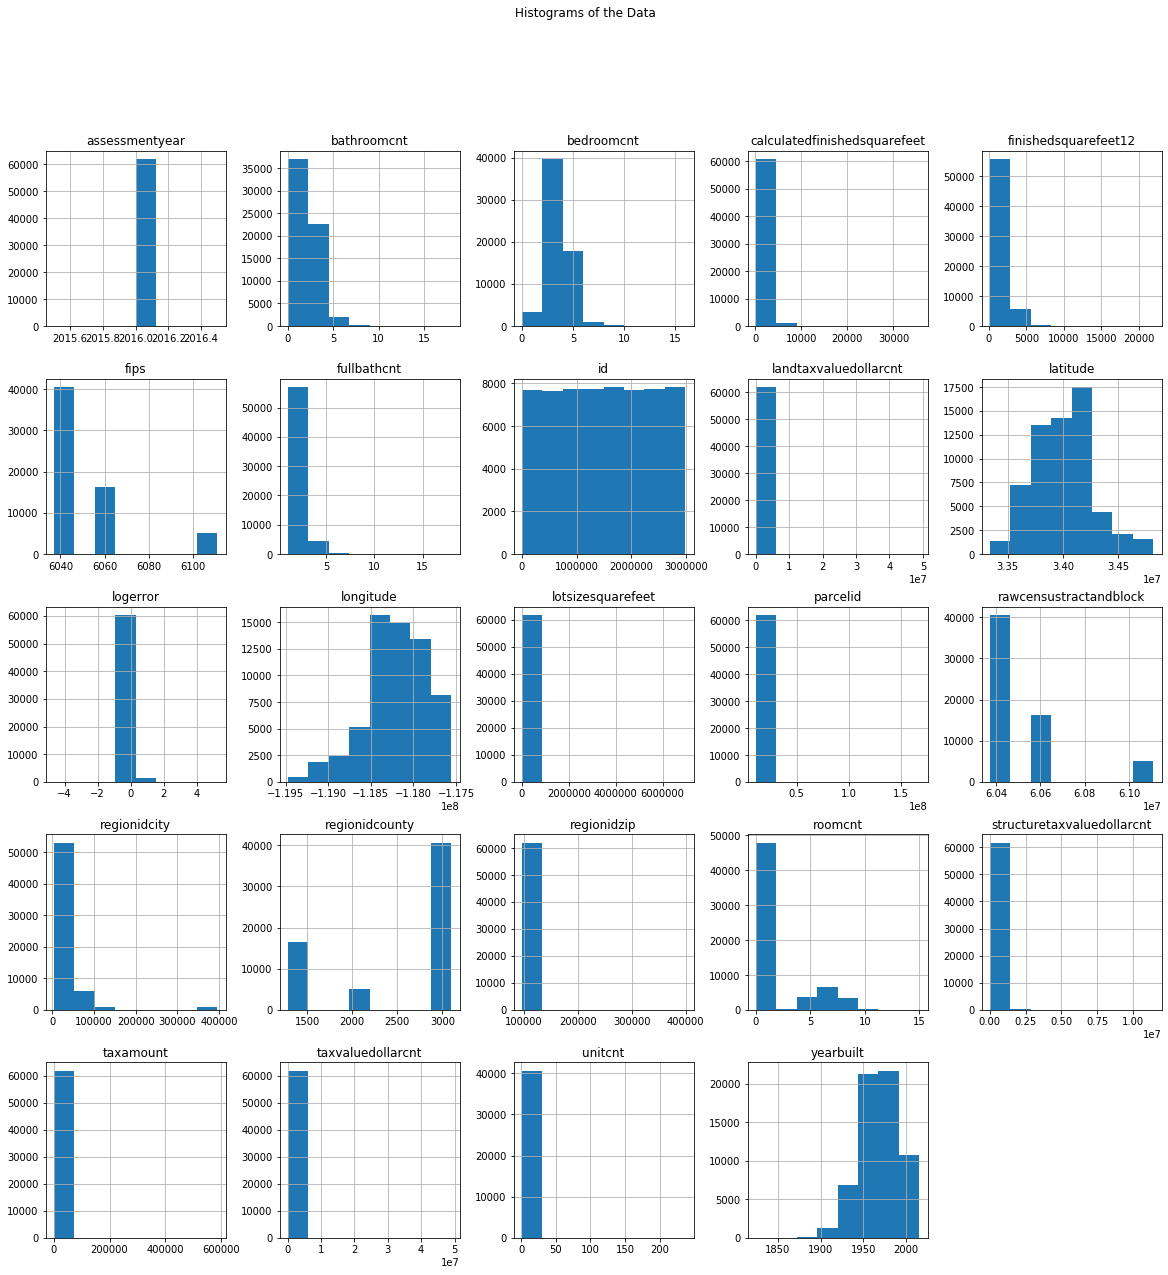

In [11]:
# Histogramming the training data
src.explore.make_histogram(train)

While informative, the plot indicates outliers, which if handled can improve the performance of our KMeans clustering algorithm, which measures distances between ALL points. This could be done using the IQR, or Interquartile Range.

While we all know math, for anyone pulling our git for research, first, don't. Second, IQR is basically this: take numbers 1, 2, 3, 4, 5, 6, 7, 8, 9. The median is 5 - it's the middle value. On the left of 5 you have four numbers (1, 2, 3, 4). On the right of 5, you have four numbers (6, 7, 8, 9). Take the average of the middle two numbers on the left (2 and 3; average = 2.5) and the average of the two middle numbers on the right (7 and 8; average = 7.5). Then subtract these two averages from each other (7.5 - 2.5) and you have your IQR (5).

Basically, 100% of the data is split into 4-25% chunks, Q1-Q4. The Q's are multiplied by a "k" that determines just how extreme the outliers we're removing are. The higher the k, the more extreme the outlier.

That was a long way to say we're going with Tukey and using 1.5 in determining our k value.

## Correlation Heatmap

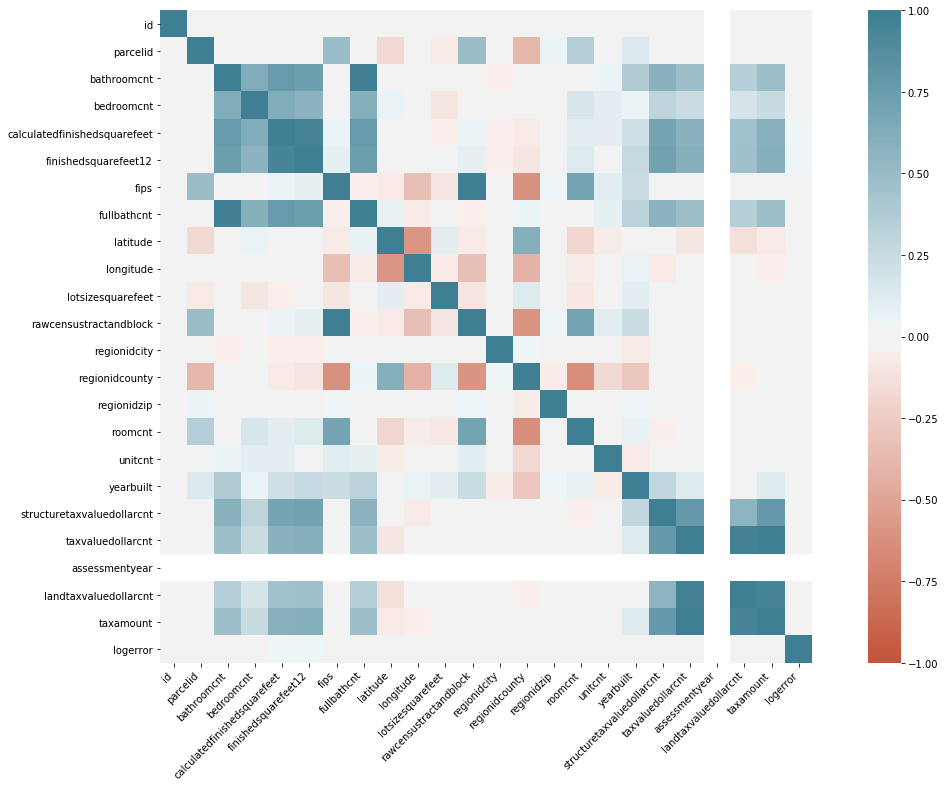

In [12]:
# Visualizing correlations:
src.explore.make_heatmap(train)

**Takeaways:**

__1) Logerror seems to be on an island all by itself__

# Pair Plot

In [17]:
# Commenting this one out, since it takes FOREVER to load. 
# Feel free to uncomment it to see, if you're willing to wait a minute to run it

# sns.pairplot(ex_df, hue='fips')

#### A decision was made to run correlation tests against our findings

In [14]:
# Function to run comprehensive correlation test and plot results
def combo_corr(train, x_string, y_string):
    r, p = stats.pearsonr(train[x_string], train[y_string])
    train.plot.scatter(x_string, y_string)
    plt.title(f"{x_string}'s and {y_string}'s Relationship")
    print(f"The p value in this relationship is {p}, meaning the odds are {round(p, 3)}% this relationship is due to pure chance")
    print(f"r = {round(r, 2)}")
    plt.show()

# Modeling

For the modeling we're going to convert the floats we want to keep (i.e. fips) as objects so they aren't being scaled and throwing off the data

In [18]:
# Conserving Dtypes
df = src.prepare.numeric_to_object(df)

## Split and Scale the Data 

In [19]:
train, test, validate = src.preprocessing.split_scale_data(df)

## Creating Clusters

### Make a Dataframe to hold the Clusters

In [19]:
clusters_df = pd.DataFrame(index=train.index)

### Cluster Model 1: Kitchen Sink

We're throwing everything in this cluster

In [21]:
X = ["bathroomcnt", 
     "bedroomcnt", 
     "lotsizesquarefeet",
     "calculatedfinishedsquarefeet", 
     "taxamount", 
     "taxvaluedollarcnt",  
     "fips",
     "longitude", 
     "latitude"]

X_train = train[X]

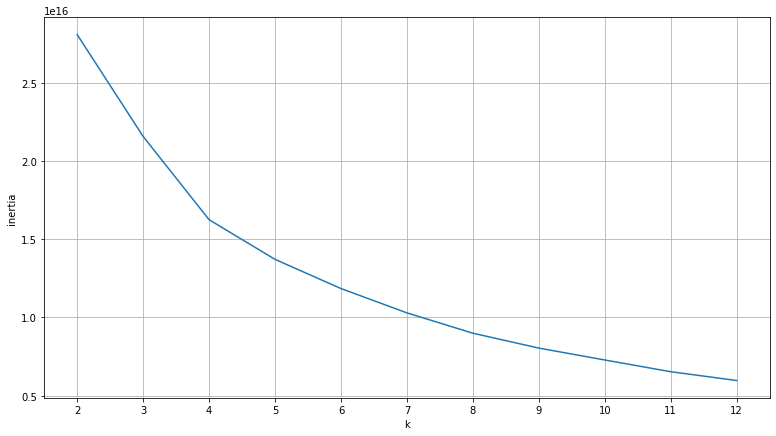

In [22]:
# Graph the inertias to determine which K to use 
src.model.plot_inertia(X_train)

Looks like a K of 6 is our best bet.

In [24]:
kitchen_sink, clusters_df = src.model.build_and_predict_clusters(6, X_train, clusters_df, 'kitchen_sink')

### Cluster Model 2: Square Feet, Latitude, Longitude

Stat testing indicated these features were our best options

In [26]:
X = ["calculatedfinishedsquarefeet", 
     "longitude", 
     "latitude"]

X_train = train[X]

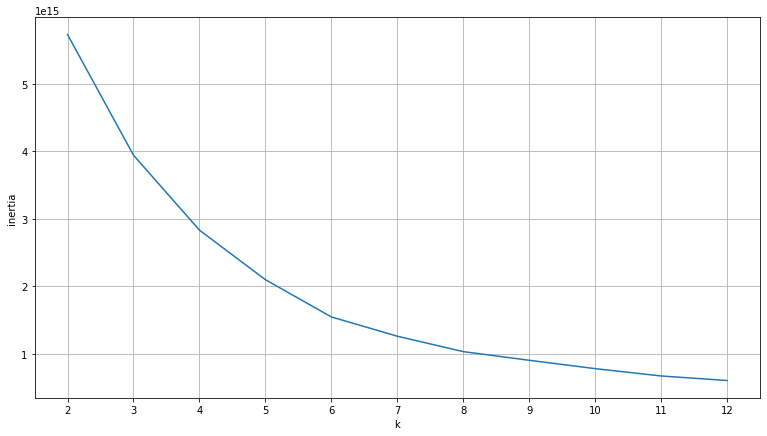

In [27]:
# Graph the inertias to determine which K to use 
src.model.plot_inertia(X_train)

Looks like a K of 6 is our best bet.

In [28]:
sqft_lat_long, clusters_df = src.model.build_and_predict_clusters(6, X_train, clusters_df, 'sqft_lat_long')

### Cluster Model 3: Location, Location, Location

We're throwing everything in this cluster

In [30]:
X = ["fips",
     "longitude", 
     "latitude"]

X_train = train[X]

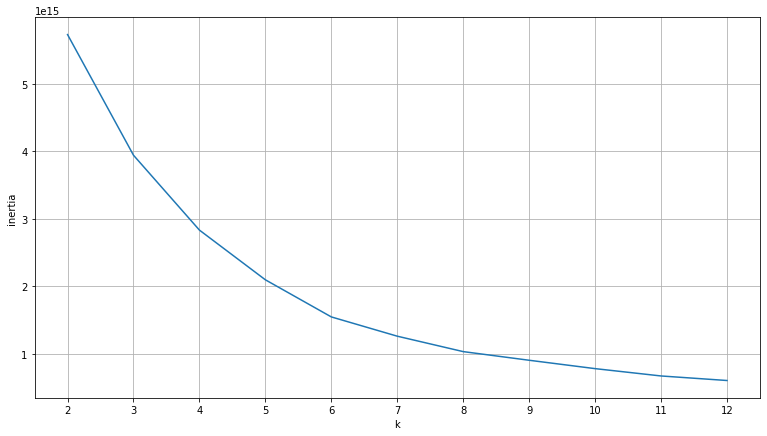

In [31]:
# Graph the inertias to determine which K to use 
src.model.plot_inertia(X_train)

Looks like a K of 5 is our best bet.

In [32]:
location, clusters_df = src.model.build_and_predict_clusters(5, X_train, clusters_df, 'location')

# Evaluation

Lets make a dataframe to hold our predictions

In [34]:
predictions = pd.DataFrame({'actual': train.logerror})

## Set a Baseline

In [35]:
# Use median to make a baseline model
predictions['baseline'] = predictions.actual.median()

## Test the Models by Using Linear Regression to Predict Log Error

In [37]:
kitchen_sink  = LinearRegression().fit(clusters_df[['kitchen_sink']], predictions.actual)
sqft_lat_long = LinearRegression().fit(clusters_df[['sqft_lat_long']], predictions.actual)
location      = LinearRegression().fit(clusters_df[['location']], predictions.actual)

In [43]:
predictions['kitchen_sink']  = kitchen_sink.predict(clusters_df[['kitchen_sink']])
predictions['sqft_lat_long'] = sqft_lat_long.predict(clusters_df[['sqft_lat_long']])
predictions['location']      = location.predict(clusters_df[['location']])

# Examine the Scores

In [ ]:
kitchen_sink.score()

# Conclusion